In [ ]:
# Use some function for neural networks like Stochastic gradient descent or backpropagation algorithm to predict the value of a variable based on the dataset of problem14

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X=cancer.data
Y=cancer.target
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#checking for null
display(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [ ]:
#standardization
import scipy.stats as stats
x_scaled=stats.zscore(X,axis=0)
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
#split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.25)
print("Entries in x_train : ",x_train.shape)
print("Entries in x_test : ",x_test.shape)

Entries in x_train :  (426, 30)
Entries in x_train :  (143, 30)


In [ ]:
#Classification Neural Network  Model
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier(hidden_layer_sizes=(70,60),activation="logistic",solver='sgd',max_iter=1500)
#Two hidden layersfirst with 70 neuron and second with 60 neurons
#by default OUTPUT LAYER will have number of neurons=number of classes.
#algorithm-sgd:stochastic gradient descent(check gradient descent algo pdf shared)
clf=mlpc.fit(x_train,y_train)
pred=mlpc.predict(x_test)
display(pred)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
cm=confusion_matrix(y_test,pred)
df2=pd.DataFrame(data=cm,columns=cancer.target_names)
df2

,malignant,benign
0,46,6
1,2,89


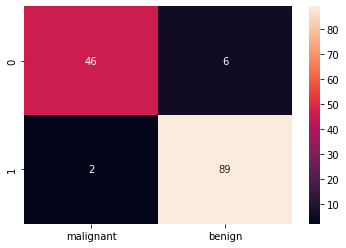

In [ ]:
sns.heatmap(df2,annot=True)
plt.show()

In [ ]:
print('accuracy score : ',round(accuracy_score(y_test,pred),2)*100)

accuracy score :  94.0


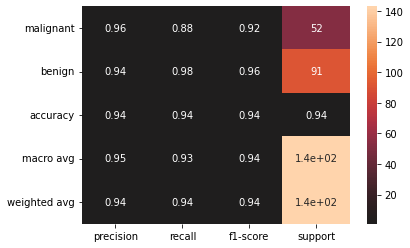

In [ ]:
report=classification_report(y_test,pred,target_names=cancer.target_names,output_dict=True)
df3=pd.DataFrame(report)
sns.heatmap(df3.T,annot=True,center=True)
plt.show()

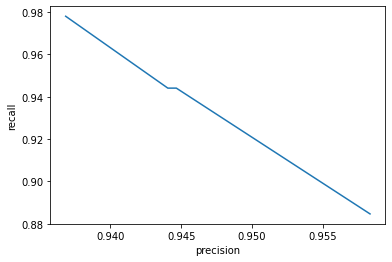

In [ ]:
# precision Vs recall
sns.lineplot(x=df3.iloc[0],y=df3.iloc[1])
plt.show()

# MLPRegressor

In [ ]:
from sklearn.datasets import load_boston
house=load_boston()
X1=house.data
Y1=house.target
dff=pd.DataFrame(house.data,columns=house.feature_names)
dff.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#checking for null
display(dff.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
#standardization
import scipy.stats as stats
x_scaled1=stats.zscore(X1,axis=0)
x_scaled1

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [ ]:
#split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled1,Y1,test_size=0.25)
print("Entries in x_train : ",x_train1.shape)
print("Entries in x_train : ",x_test1.shape)

Entries in x_train :  (379, 13)
Entries in x_train :  (127, 13)


In [ ]:
#For Neural Network Regression Model
from sklearn.neural_network import MLPRegressor
mlpc=MLPRegressor(hidden_layer_sizes=(64,64,32),activation="logistic",solver='sgd',max_iter=2500)
# 3 hidden layers: 64 neurons, 64 neurons, 32 neurons in 1st, 2nd and 3rd layer
clf1=mlpc.fit(x_train1,y_train1)
pred1=mlpc.predict(x_test1)
display(pred1)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


array([24.17192983, 19.12032844, 24.10473217,  7.22627165, 27.57483073,
       21.14433894, 20.66591066, 12.66709734, 21.99503396, 21.15410172,
       23.10479775, 14.73977891, 22.03191911, 22.44996959, 21.64107296,
       20.97581486, 31.20966879, 22.12067602, 20.37100491, 24.52770072,
       20.39237054, 20.78604261, 18.26171938, 16.87379426, 12.83986944,
       22.56284701, 25.73181091, 19.30643615, 25.76132507,  8.2570391 ,
       13.18560968, 47.53967299, 17.58811602, 17.72853682, 10.19400136,
       17.70954413, 21.29877903, 14.18156695, 15.73042624, 20.68045314,
       45.26518066, 14.19812606, 30.35633485, 21.06542757, 20.90366763,
       21.05627392, 19.26655186, 36.64830571,  9.28756662, 23.24273768,
       26.5948734 , 19.72940733,  8.67467068, 18.22509553, 11.96003939,
       14.90672425, 21.72625645, 26.04838231, 42.29985893,  9.64577961,
       24.10522708, 24.70680033, 14.28383864, 39.18669397, 12.15675872,
       25.96823605, 23.32094209, 22.43804981, 13.23906226, 51.64

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
print('R2-score of MLPRegressor is ',r2_score(y_test1,pred1)*100)
print('RMSE of MLPRegressor is',np.sqrt(mean_squared_error(y_test1,pred1)))

R2-score of MLPRegressor is  91.79823226360162
RMSE of MLPRegressor is 2.7724497571964943
